# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data2 = joblib.load('data2.pkl')


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data2.dropna(inplace=True)
data2 = data2.astype({'holiday':'int'})

In [11]:
data2.columns

Index(['Date', 'Drive', 'Receipt', 'Boarding', 'Waiting', 'Fee', 'Distance',
       'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'weekday', 'month', 'season',
       'year', 'holiday', 'Waiting_7d', 'BoardingR', 'holiday2'],
      dtype='object')

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data2.drop(['month', 'weekday', 'Waiting_7d', 'BoardingR'], axis=1, inplace=True)


In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data2.head()


,Date,Drive,Receipt,Boarding,Waiting,Fee,Distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,year,holiday,holiday2
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07,Winter,2015,1,1
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66,Winter,2015,0,0
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32,Winter,2015,0,1
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48,Winter,2015,0,1
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47,Winter,2015,0,0


### (2) 가변수화

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
dumm_cols = ['season']
data2 = pd.get_dummies(data2, columns=dumm_cols, drop_first=True, dtype=int)

In [15]:
data2.head()

,Date,Drive,Receipt,Boarding,Waiting,Fee,Distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),year,holiday,holiday2,season_Summer,season_Fall,season_Winter
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07,2015,1,1,0,0,1
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66,2015,0,0,0,0,1
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32,2015,0,1,0,0,1
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48,2015,0,1,0,0,1
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47,2015,0,0,0,0,1


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 1) x, y 나누기

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# x와 y 분리
target = 'Waiting'
x = data2.drop(target, axis=1)
y = data2.loc[:, target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91, shuffle=False)

In [19]:
test_date = x_test.loc[:, 'Date']
test_date

2831   2022-10-01
2832   2022-10-02
2833   2022-10-03
2834   2022-10-04
2835   2022-10-05
          ...    
2917   2022-12-26
2918   2022-12-27
2919   2022-12-28
2920   2022-12-29
2921   2022-12-30
Name: Date, Length: 91, dtype: datetime64[ns]

In [20]:
x_train.drop('Date', axis=1, inplace=True)
x_test.drop('Date', axis=1, inplace=True)

### (4) Scaling
* KNN, SVM 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [21]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# Regression 이죠 일단


In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

 

In [24]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### (1) 머신러닝

#### 1) 모델1 - Linear Regression

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_lr))

result = {}
result['lr'] = [mean_absolute_error(y_test, y_pred_lr), mean_absolute_percentage_error(y_test, y_pred_lr)]

MAE: 3.916885903325385
MAPE 0.09567069901446702


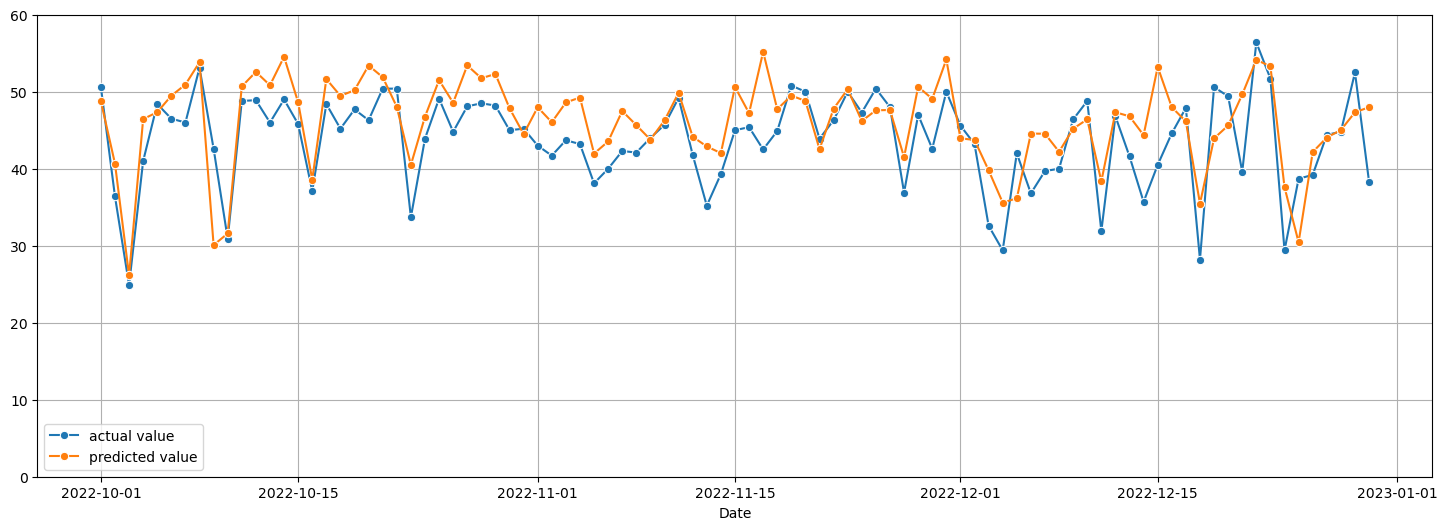

In [27]:
# 시각화
pred_plot(y_test, y_pred_lr, test_date)

#### 2) 모델2 - Random Forest

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(max_depth=9) #max_depth=5, min_samples_leaf=5, min_samples_split=5
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_rf))
print('R2:', r2_score(y_test, y_pred_rf))

result['rf'] = [mean_absolute_error(y_test, y_pred_rf), mean_absolute_percentage_error(y_test, y_pred_rf)]

MAE: 4.257208950163151
MAPE 0.0969715416541954
R2: 0.13889416274677013


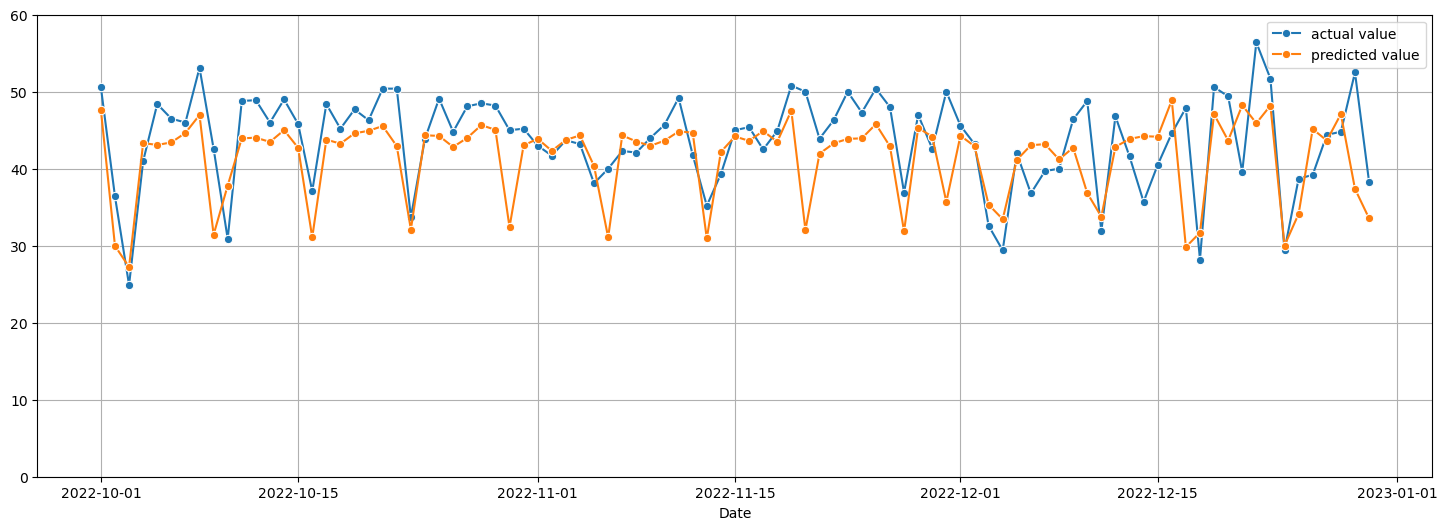

In [30]:
# 시각화
pred_plot(y_test, y_pred_rf, test_date)

#### 
3) 모델3 - LightGBM

In [31]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(verbose=-1)
model_lgbm.fit(x_train, y_train)
y_pred_lgbm = model_lgbm.predict(x_test)

MAE: 4.15422969782852
MAPE 0.09288936621967532
r2: 0.24448281375965875


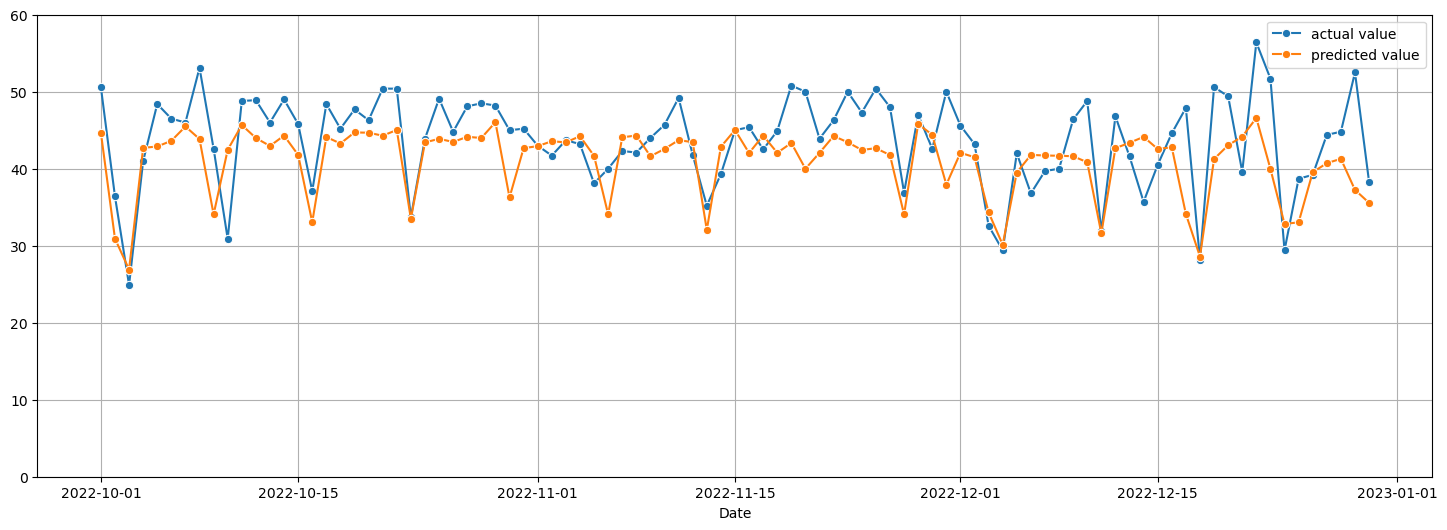

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print('MAE:', mean_absolute_error(y_test, y_pred_lgbm))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_lgbm))
print('r2:', r2_score(y_test, y_pred_lgbm))
pred_plot(y_test, y_pred_lgbm, test_date)

result['lgbm'] = [mean_absolute_error(y_test, y_pred_lgbm), mean_absolute_percentage_error(y_test, y_pred_lgbm)]

#### 4) 모델4 - KNN

In [33]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(x_train_s, y_train)
y_pred_knn = model_knn.predict(x_test_s)

MAE: 6.693040293040292
MAPE 0.15059024767610454


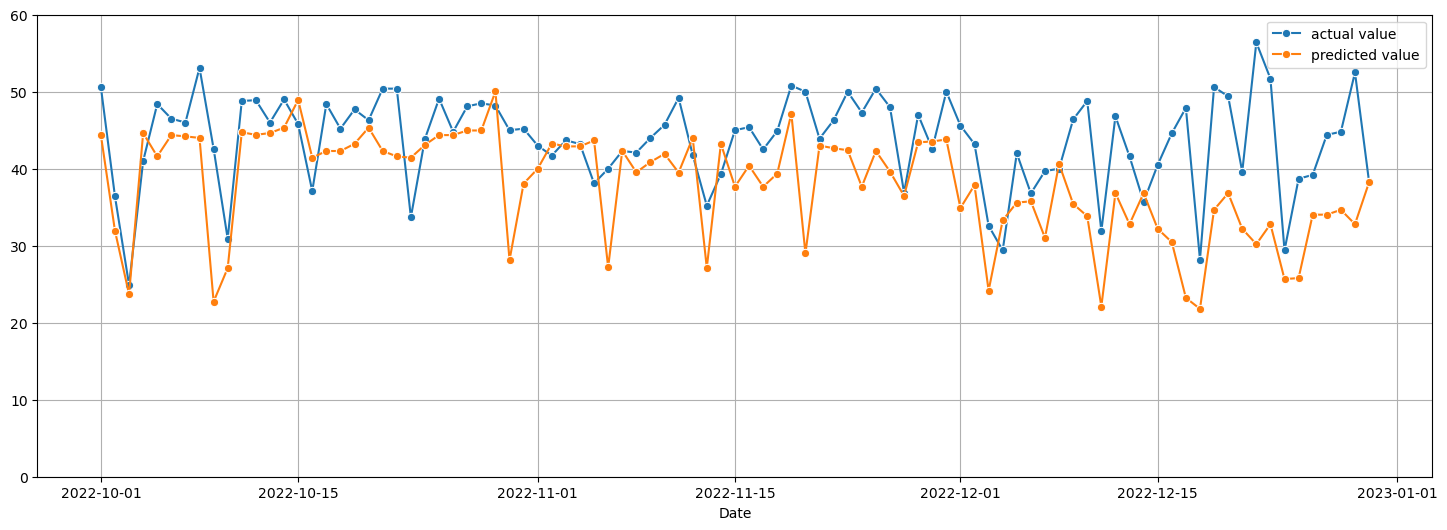

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print('MAE:', mean_absolute_error(y_test, y_pred_knn))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred_knn))
pred_plot(y_test, y_pred_knn, test_date)

result['knn'] = [mean_absolute_error(y_test, y_pred_knn), mean_absolute_percentage_error(y_test, y_pred_knn)]

## 3.모델별 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.
 
    * 성능 가이드
      * MAE : 4 ~ 6
      * MAPE : 0.09~0.14

In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
result


{'lr': [3.916885903325385, 0.09567069901446702],
 'rf': [4.257208950163151, 0.0969715416541954],
 'lgbm': [4.15422969782852, 0.09288936621967532],
 'knn': [6.693040293040292, 0.15059024767610454]}

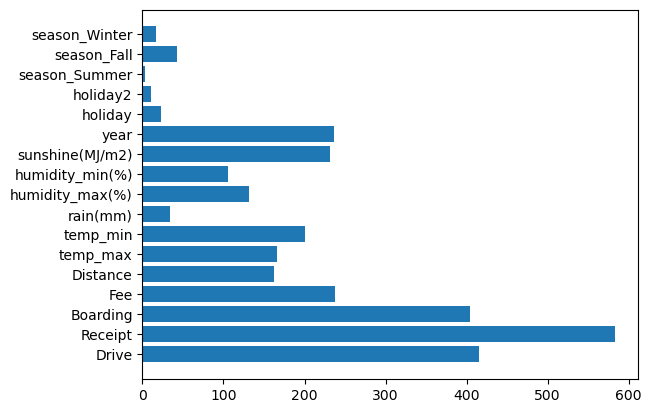

In [36]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.barh(y=list(x_train), width=model_lgbm.feature_importances_)
plt.show()